# Exercice 1

## Q1

In [8]:
import pandas as pd

## Q2

In [9]:
df = pd.read_excel('Multivariate_Linear_Regression_dataset.xlsx')
df

,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Q3

In [10]:
df.head()


,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Q4

In [13]:
print(df.columns)

y = df['prix']
xi = df[['taille_en_pieds_carre', 'nb_chambres']]

print("Target variable (y):")
print(y.head())

print("\nPredictive variables (xi):")
print(xi.head())


Index(['taille_en_pieds_carre', 'nb_chambres', 'prix'], dtype='object')
Target variable (y):
0    399900
1    329900
2    369000
3    232000
4    539900
Name: prix, dtype: int64

Predictive variables (xi):
   taille_en_pieds_carre  nb_chambres
0                   2104            3
1                   1600            3
2                   2400            3
3                   1416            2
4                   3000            4


# Exercice 2

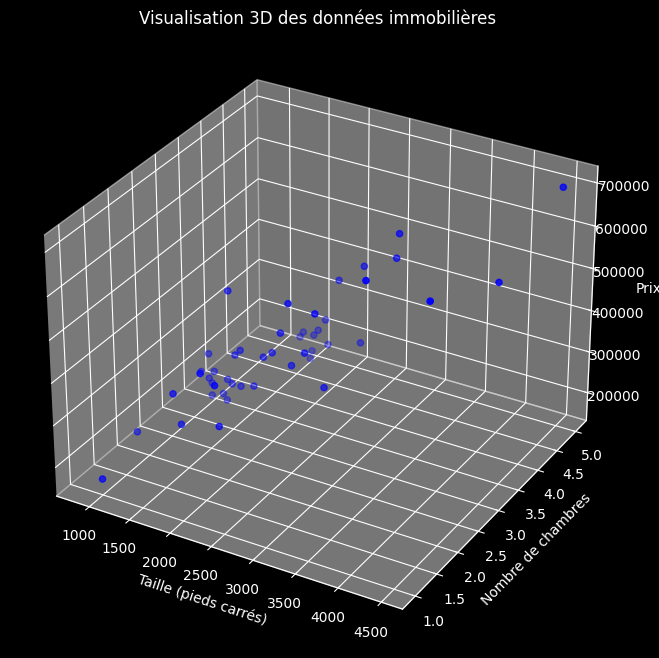

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['taille_en_pieds_carre'], df['nb_chambres'], df['prix'], c='blue', marker='o')

ax.set_xlabel('Taille (pieds carrés)')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix')

plt.title('Visualisation 3D des données immobilières')

plt.show()


_Le code en dessous as été fait par IA_

In [16]:
import plotly.express as px

fig = px.scatter_3d(df, x='taille_en_pieds_carre', y='nb_chambres', z='prix',
                    labels={
                        'taille_en_pieds_carre': 'Taille (pieds carrés)',
                        'nb_chambres': 'Nombre de chambres',
                        'prix': 'Prix'
                    },
                    title='Visualisation 3D interactive des données immobilières')

# Show the interactive plot
fig.show()


# Exercice 3

In [18]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

xi_scaled = scaler.fit_transform(xi)

print(xi_scaled[:5])



[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


# Exercice 4

# Q1

In [20]:
import statsmodels.api as sm

model = sm.OLS(y, xi_scaled)

# Q2

In [21]:
results = model.fit()

# Q3

In [22]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.085
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              2.104
Date:                Tue, 06 Jan 2026   Prob (F-statistic):                       0.134
Time:                        14:47:23   Log-Likelihood:                         -666.19
No. Observations:                  47   AIC:                                      1336.
Df Residuals:                      45   BIC:                                      1340.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Q4

In [23]:
# 4. Répétez les points 1 à 3 après avoir utilisé la méthode add_constant() pour estimer la valeur de a0 != 0
xi_scaled_const = sm.add_constant(xi_scaled)

model_const = sm.OLS(y, xi_scaled_const)
results_const = model_const.fit()

print(results_const.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           2.43e-13
Time:                        14:47:30   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.0

# Exercice 5

Formule déduite pour données brutes : Prix = 89597.91 + 139.21 * Taille + -8738.02 * Chambres


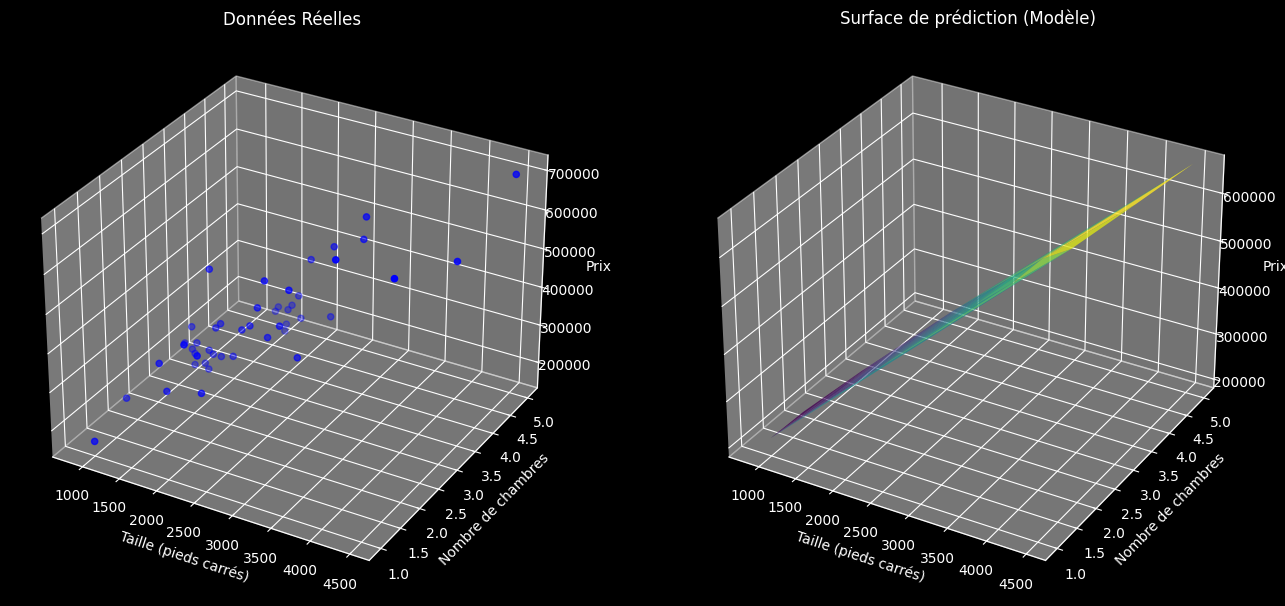

In [27]:

means = scaler.mean_
stds = scaler.scale_

mean_taille = means[0]
std_taille = stds[0]
mean_chambres = means[1]
std_chambres = stds[1]

params = results_const.params

real_a0 = params.iloc[0] - (params.iloc[1] * mean_taille / std_taille) - (params.iloc[2] * mean_chambres / std_chambres)
real_a1 = params.iloc[1] / std_taille
real_a2 = params.iloc[2] / std_chambres

print(f"Formule déduite pour données brutes : Prix = {real_a0:.2f} + {real_a1:.2f} * Taille + {real_a2:.2f} * Chambres")

def predict_price_of_house(taille_maison, nb_chambre):
    return real_a0 + real_a1 * taille_maison + real_a2 * nb_chambre

def predict_all(lst_sizes, lst_nb_chmbres):
    predicted_prices = []
    # On itère sur les indices
    for n in range(len(lst_sizes)):
        predicted_prices.append(predict_price_of_house(lst_sizes.iloc[n], lst_nb_chmbres.iloc[n]))
    return predicted_prices


predictions = predict_all(df['taille_en_pieds_carre'], df['nb_chambres'])


fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df['taille_en_pieds_carre'], df['nb_chambres'], df['prix'], c='blue', marker='o')
ax1.set_xlabel('Taille (pieds carrés)')
ax1.set_ylabel('Nombre de chambres')
ax1.set_zlabel('Prix')
ax1.set_title('Données Réelles')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_trisurf(df['taille_en_pieds_carre'], df['nb_chambres'], predictions, cmap='viridis', linewidth=0.2, alpha=0.8)
ax2.set_xlabel('Taille (pieds carrés)')
ax2.set_ylabel('Nombre de chambres')
ax2.set_zlabel('Prix')
ax2.set_title('Surface de prédiction (Modèle)')

plt.show()


# Exercice 6

In [28]:

price = predict_price_of_house(4500, 5)
print(f"Prix estimé : {price:.2f} $")



Prix estimé : 672355.85 $
